In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importation of necessary packages and modules

import snscrape.modules.twitter as tw
import pandas as pd
from google.colab import files

In [ ]:
# Extraction of Tweets

query = "citi bank"
tweets = []
limit = 1000
for tweet in tw.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date,tweet.username,tweet.content])
df = pd.DataFrame(tweets,columns=['Date','Username','Tweet'])
df

,Date,Username,Tweet
0,2022-06-03 17:43:49+00:00,BillMew,@sarbjeetjohal @Telegraph @Citibank @dez_blanc...
1,2022-06-03 17:40:54+00:00,nokidhungry,@Citibank We are so thankful for all the #Hung...
2,2022-06-03 17:36:38+00:00,its_berbs,god. what a choice this was in 2020. listen to...
3,2022-06-03 17:36:31+00:00,sarbjeetjohal,@BillMew @Telegraph @Citibank @dez_blanchfield...
4,2022-06-03 17:29:20+00:00,ChrisPratt956,@lukebryan @BayerUS @Citibank @FarmlandFoods @...
...,...,...,...
995,2022-05-30 08:07:59+00:00,CommonMan_7,@AshishBahety @ateetgagrani ध्यान से देखिए cit...
996,2022-05-30 08:05:22+00:00,Maelstrome,@Citibank In remembrance of those who had thei...
997,2022-05-30 08:01:01+00:00,Maelstrome,@Citibank 'The ultimate sacrifice'. Losing the...
998,2022-05-30 07:54:29+00:00,Kirti,@yadsul @ProsaicView @LavinaSolomon I remember...


In [ ]:
df2 = df
df2.to_csv('Tweets.csv')

In [ ]:
files.download('Tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Tweets Pre-processing

import re
def Tweet_cleaner(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text)
  text = re.sub(r'@__[A-Za-z0-9]+', '',text)
  text = re.sub(r'__[A-Za-z0-9]+', '',text)
  text = re.sub(r'_[A-Za-z0-9]+', '',text)
  text = re.sub(r'$[A-Za-z0-9]+', '',text)
  text = re.sub(r'&[A-Za-z0-9]+', '',text)
  text = re.sub(r'CITIBANK', '',text)
  text = re.sub(r'Citi', '',text)
  text = re.sub(r'Bank', '',text)
  text = re.sub(r'bank', '',text)
  text = re.sub(r'citi', '',text)
  text = re.sub(r'\+', '',text)
  text = re.sub(r'@', '',text)
  text = re.sub(r':', '',text)
  text = re.sub(r';', '',text)
  text = re.sub(r'#', '',text)
  text = re.sub(r'https:[A-Za-z0-9]+', '',text)
  text = re.sub(r'httpst.coN00hRkICzI', '',text)
  text = re.sub(r'https://[A-Za-z0-9]+', '',text)
  text = re.sub(r'httpst://[A-Za-z0-9]+', '',text)
  text = re.sub(r'httpst[A-Za-z0-9]+', '',text)
  text = re.sub(r'htt[A-Za-z0-9]+', '',text)
  text = re.sub(r'httpst.[A-Za-z0-9]+', '',text)
  text = re.sub(r'httpst', '',text)
  text = re.sub(r'http:[A-Za-z0-9]+', '',text)
  text = re.sub(r'http://[A-Za-z0-9]+', '',text)
  text = re.sub(r'citi bank', '',text)
  text = re.sub(r'citibank', '',text)
  text = re.sub(r'Citi bank', '',text)
  text = re.sub(r'Citibank', '',text)
  text = re.sub(r'Citi Bank', '',text)
  text = re.sub(r'CitiBank', '',text)
  text = re.sub(r'-', '',text)
  text = re.sub(r'/', '',text)
  text = re.sub(r',', '',text)
  text = re.sub(r'RT[\s]+', '',text)
  return text
df['Tweet'] = df['Tweet'].apply(Tweet_cleaner)
df

,Date,Username,Tweet
0,2022-06-03 17:43:49+00:00,BillMew,I totally agree \nHence my question...
1,2022-06-03 17:40:54+00:00,nokidhungry,We are so thankful for all the HungerHeroes w...
2,2022-06-03 17:36:38+00:00,its_berbs,god. what a choice this was in 2020. listen to...
3,2022-06-03 17:36:31+00:00,sarbjeetjohal,Properly coded software would have c...
4,2022-06-03 17:29:20+00:00,ChrisPratt956,🥰
...,...,...,...
995,2022-05-30 08:07:59+00:00,CommonMan_7,ध्यान से देखिए को इसकी गर्दन नीचे गई थी और ...
996,2022-05-30 08:05:22+00:00,Maelstrome,In remembrance of those who had their homes s...
997,2022-05-30 08:01:01+00:00,Maelstrome,'The ultimate sacrifice'. Losing their homes ...
998,2022-05-30 07:54:29+00:00,Kirti,I remember telling me to mask the 1st 8 nu...


In [ ]:
# Sentiment Analysis Part

from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

df

,Date,Username,Tweet,Subjectivity,Polarity
0,2022-06-03 17:43:49+00:00,BillMew,I totally agree \nHence my question...,0.321429,0.071429
1,2022-06-03 17:40:54+00:00,nokidhungry,We are so thankful for all the HungerHeroes w...,0.000000,0.000000
2,2022-06-03 17:36:38+00:00,its_berbs,god. what a choice this was in 2020. listen to...,0.518182,0.345455
3,2022-06-03 17:36:31+00:00,sarbjeetjohal,Properly coded software would have c...,0.393750,-0.156250
4,2022-06-03 17:29:20+00:00,ChrisPratt956,🥰,0.000000,0.000000
...,...,...,...,...,...
995,2022-05-30 08:07:59+00:00,CommonMan_7,ध्यान से देखिए को इसकी गर्दन नीचे गई थी और ...,0.469444,0.097222
996,2022-05-30 08:05:22+00:00,Maelstrome,In remembrance of those who had their homes s...,0.650000,0.250000
997,2022-05-30 08:01:01+00:00,Maelstrome,'The ultimate sacrifice'. Losing their homes ...,1.000000,0.000000
998,2022-05-30 07:54:29+00:00,Kirti,I remember telling me to mask the 1st 8 nu...,0.350000,0.100000


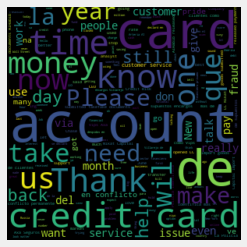

In [ ]:
# Words plotting using Word-cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
All_Tweets = ' '.join([ twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 300,height = 300,random_state = 45,max_font_size = 120).generate(All_Tweets)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Categorization of Tweets

def Tweet_Analysis(score):
  if score<0:
    return 'Negative Tweet'
  elif score==0:
    return 'Neutral Tweet'
  else:
    return 'Positive Tweet'

df['Tweet_type'] = df['Polarity'].apply(Tweet_Analysis)
df

,Date,Username,Tweet,Subjectivity,Polarity,Tweet_type
0,2022-06-03 17:43:49+00:00,BillMew,I totally agree \nHence my question...,0.321429,0.071429,Positive Tweet
1,2022-06-03 17:40:54+00:00,nokidhungry,We are so thankful for all the HungerHeroes w...,0.000000,0.000000,Neutral Tweet
2,2022-06-03 17:36:38+00:00,its_berbs,god. what a choice this was in 2020. listen to...,0.518182,0.345455,Positive Tweet
3,2022-06-03 17:36:31+00:00,sarbjeetjohal,Properly coded software would have c...,0.393750,-0.156250,Negative Tweet
4,2022-06-03 17:29:20+00:00,ChrisPratt956,🥰,0.000000,0.000000,Neutral Tweet
...,...,...,...,...,...,...
995,2022-05-30 08:07:59+00:00,CommonMan_7,ध्यान से देखिए को इसकी गर्दन नीचे गई थी और ...,0.469444,0.097222,Positive Tweet
996,2022-05-30 08:05:22+00:00,Maelstrome,In remembrance of those who had their homes s...,0.650000,0.250000,Positive Tweet
997,2022-05-30 08:01:01+00:00,Maelstrome,'The ultimate sacrifice'. Losing their homes ...,1.000000,0.000000,Neutral Tweet
998,2022-05-30 07:54:29+00:00,Kirti,I remember telling me to mask the 1st 8 nu...,0.350000,0.100000,Positive Tweet


In [ ]:
# Count of Positive Tweets

i = 1
count = 0
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Positive Tweet'):
    count += 1
    i = i+1
print(count)

329


In [ ]:
# Visualization of Positive Tweets

i = 1
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Positive Tweet'):
    print(str(i) + ')' + df_sorted['Tweet'][i])
    print()
    i = i+1

1) We are so thankful for all the HungerHeroes who joined us for ChefsCycle! 🧡🚲

2)god. what a choice this was in 2020. listen to the Mac Attack wheeze about the 8th time he saved  in a dive bar in Wilmington or order 1 beer for yourself in a Florida hotel while Donald chugs Diet Coke and gives you a brand new strain of COVID. honestly 2 still wins .cop8vhrXtsoQ

3)          Properly coded software would have caught that mistake (I mean warn the user). Is there a term like TraderX (trader experience) yet?

4)         🥰

5)Ooops
Trader working from home wipes out €300bn in stocks after adding extra zero  
.coZDiWODMoXl

Where were the regulatory compliance and risk controls?
?

       

6)  .coR0j7WlJO0s

7)          Got my tickets can't wait. I am so ready

8)  .coyTK4EwzC8y

9) when will you fix the prices of Thank You program so it's not a rip off?

10) Av Venezuela Edificio  Oficina 11E. Al lado del parque de las flores. Lo espero.

11)Einige ihrer Kunden sind Ikea Volkswagen Group 

In [ ]:
# Count of Negative Tweets

i = 1
count = 0
df_sorted = df.sort_values(by = ['Polarity'], ascending  = 'False')
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Negative Tweet'):
    count += 1
    i = i+1
print(count)

194


In [ ]:
# Viewing of Negative Tweets

i = 1
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Negative Tweet'):
    print(str(i) + ')' + df_sorted['Tweet'][i])
    print()
    i = i+1

1) We are so thankful for all the HungerHeroes who joined us for ChefsCycle! 🧡🚲

2)god. what a choice this was in 2020. listen to the Mac Attack wheeze about the 8th time he saved  in a dive bar in Wilmington or order 1 beer for yourself in a Florida hotel while Donald chugs Diet Coke and gives you a brand new strain of COVID. honestly 2 still wins .cop8vhrXtsoQ

3)          Properly coded software would have caught that mistake (I mean warn the user). Is there a term like TraderX (trader experience) yet?

4)         🥰

5)Ooops
Trader working from home wipes out €300bn in stocks after adding extra zero  
.coZDiWODMoXl

Where were the regulatory compliance and risk controls?
?

       

6)  .coR0j7WlJO0s

7)          Got my tickets can't wait. I am so ready

8)  .coyTK4EwzC8y

9) when will you fix the prices of Thank You program so it's not a rip off?

10) Av Venezuela Edificio  Oficina 11E. Al lado del parque de las flores. Lo espero.

11)Einige ihrer Kunden sind Ikea Volkswagen Group 

In [ ]:
# Count of Neutral Tweets

i = 1
count = 0
df_sorted = df.sort_values(by = ['Polarity'], ascending  = 'False')
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Neutral Tweet'):
    count += 1
    i = i+1
print(count)

477


In [ ]:
# Visualization of Neutral Tweets

i = 1
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Neutral Tweet'):
    print(str(i) + ')' + df_sorted['Tweet'][i])
    print()
    i = i+1

1) We are so thankful for all the HungerHeroes who joined us for ChefsCycle! 🧡🚲

2)god. what a choice this was in 2020. listen to the Mac Attack wheeze about the 8th time he saved  in a dive bar in Wilmington or order 1 beer for yourself in a Florida hotel while Donald chugs Diet Coke and gives you a brand new strain of COVID. honestly 2 still wins .cop8vhrXtsoQ

3)          Properly coded software would have caught that mistake (I mean warn the user). Is there a term like TraderX (trader experience) yet?

4)         🥰

5)Ooops
Trader working from home wipes out €300bn in stocks after adding extra zero  
.coZDiWODMoXl

Where were the regulatory compliance and risk controls?
?

       

6)  .coR0j7WlJO0s

7)          Got my tickets can't wait. I am so ready

8)  .coyTK4EwzC8y

9) when will you fix the prices of Thank You program so it's not a rip off?

10) Av Venezuela Edificio  Oficina 11E. Al lado del parque de las flores. Lo espero.

11)Einige ihrer Kunden sind Ikea Volkswagen Group 

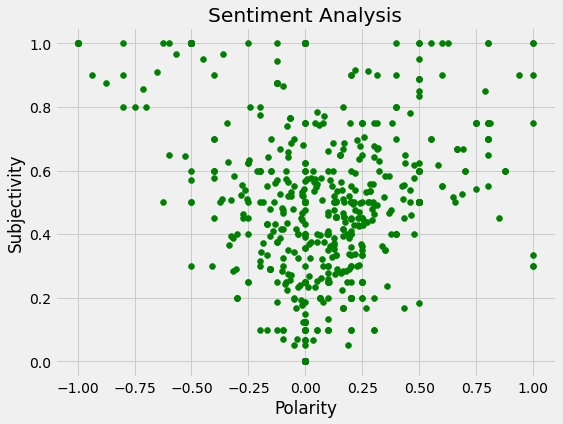

In [ ]:
# Sentiment Analysis Graphical Representation

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Positive, Negative and Neutral Tweets in Percentage :

In [ ]:
positive_tweets = df[df['Tweet_type'] == 'Positive Tweet']
round((positive_tweets.shape[0] / df.shape[0]) * 100 , 2)

32.9

In [ ]:
negative_tweets = df[df['Tweet_type'] == 'Negative Tweet']
round((negative_tweets.shape[0] / df.shape[0]) * 100 , 2)

19.4

In [ ]:
neutral_tweets = df[df['Tweet_type'] == 'Neutral Tweet']
round((neutral_tweets.shape[0] / df.shape[0]) * 100 , 2)

47.7

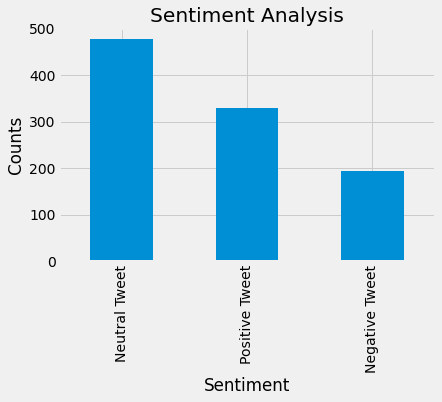

In [ ]:
# Graph of count of various types of Tweets

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df['Tweet_type'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Tweet_type'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
df_dummy = df[df['Tweet_type'] == 'Positive Tweet']
df_positive = df_dummy['Tweet']
del(df_dummy)
df_positive

0                I totally agree  \nHence my question...
2      god. what a choice this was in 2020. listen to...
7                Got my tickets can't wait. I am so r...
12      why aren't your ATMs giving out $50 bills any...
14     Presale tickets are now available for ’s Viva ...
                             ...                        
991    _ Survey utk yg bg bestt benefit dgn customer ...
993    _ Cuba la apply yg tu. Cashback rate tinggi.  ...
995      ध्यान से देखिए  को इसकी गर्दन नीचे गई थी और ...
996     In remembrance of those who had their homes s...
998       I remember  telling me to mask the 1st 8 nu...
Name: Tweet, Length: 329, dtype: object

NLP Part :

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import tokenize
from operator import itemgetter
import math

In [ ]:
# total no. of words in positive Tweets

df_positive = df_positive.to_string()
total_words = df_positive.split()
total_word_length = len(total_words)
print(total_word_length)

3082


In [ ]:
# total no. of sentences in positive Tweets

total_sentences = tokenize.sent_tokenize(df_positive)
total_sent_len = len(total_sentences)
print(total_sent_len)

104


Functions to calculate tf-idf :

In [ ]:
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

In [ ]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

In [ ]:
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1


idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

In [ ]:
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

In [ ]:
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

In [ ]:
# top 33 of important words in positive Tweets (since 32.9% of positive tweets are there we choose 33 top important words)

get_top_n(tf_idf_score,33)

{'$2': 0.0029542047242445873,
 '(SMUSHG': 0.0030138811804940767,
 '5%': 0.002564077688891257,
 'Busines': 0.0023506522454057838,
 'But': 0.0023506522454057838,
 'Cards': 0.002775175355496117,
 'Credit': 0.0032377045814121364,
 'FTX': 0.002564077688891257,
 'Financial': 0.0025955036687507296,
 'For': 0.0025955036687507296,
 'GB': 0.004228548394576875,
 'I': 0.009295385430967446,
 'JOSS': 0.0046278900550183605,
 'June': 0.0028027050608090487,
 'Lol': 0.002520033169667516,
 'New': 0.0038610199350501383,
 'STONE': 0.004377807835960512,
 'Thank': 0.003059454889919912,
 'The': 0.003017928902814515,
 'US': 0.005102358658144393,
 'You': 0.006048079607202039,
 '_': 0.004228548394576875,
 'like': 0.002508727735994425,
 'photos\\nNr': 0.0031760756934525024,
 'धांसू': 0.002564077688891257,
 'मिल': 0.002564077688891257,
 'में': 0.002564077688891257,
 'रहे': 0.002564077688891257,
 'रुपए': 0.002564077688891257,
 'हैं': 0.002564077688891257,
 '❤️': 0.002564077688891257,
 '💳\\n\\nHDFC': 0.0046019190272

In [ ]:
df_dummy = df[df['Tweet_type'] == 'Negative Tweet']
df_negative = df_dummy['Tweet']
del(df_dummy)
df_negative

3                Properly coded software would have c...
15     Seriously hate . By far the worst ing experience!
34     2. 54 million Heist \nOn January 5 1997 Charle...
35                                       I really hate  
39      Over 30 yrs of being a client you decide to c...
                             ...                        
969     Hi there! Thanks for letting us know and sorr...
970    Our branches are closed today to remember thos...
984     It's a bit like...come on guys...even aside f...
992     don't apply for   credit card. After applicat...
999      sir please save my interest as a customer fr...
Name: Tweet, Length: 194, dtype: object

In [ ]:
# total no. of words in negative Tweets

df_negative = df_negative.to_string()
total_words = df_negative.split()
total_word_length = len(total_words)
print(total_word_length)

1815


In [ ]:
# total no. of sentences in negative Tweets

total_sentences = tokenize.sent_tokenize(df_negative)
total_sent_len = len(total_sentences)
print(total_sent_len)

55


tf-idf calculation : 

In [ ]:
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

In [ ]:
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1


idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

In [ ]:
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

In [ ]:
# Top 19 important words from negative tweets since 19% of negative tweets

get_top_n(tf_idf_score, 19)

{'$32': 0.00365199559743529,
 '(3830': 0.00365199559743529,
 '34%': 0.0032052020898780836,
 'Britain': 0.005871617492072339,
 'Fargo': 0.004433713257394216,
 'I': 0.010018773612732488,
 'Is': 0.005009386806366244,
 'Not': 0.0031788073339304333,
 'Pakistan': 0.006207198560351903,
 'SpinOut': 0.003662105315709778,
 'US': 0.003963463260823753,
 'USD': 0.00365199559743529,
 'What': 0.0032344899205957434,
 'Yes': 0.003662105315709778,
 'justiceI': 0.008544912403322816,
 'know': 0.003475294150365929,
 'opened': 0.003940252745302408,
 '–': 0.00730399119487058,
 '🗓': 0.00365199559743529}

In [ ]:
df_dummy = df[df['Tweet_type'] == 'Neutral Tweet']
df_neutral = df_dummy['Tweet']
del(df_dummy)
df_neutral

1       We are so thankful for all the HungerHeroes w...
4                                                      🥰
5      Ooops\nTrader working from home wipes out €300...
6                                    httpst.coR0j7WlJO0s
8                                    httpst.coyTK4EwzC8y
                             ...                        
985    Demandez à la  de restituer à Haïti les 500 00...
989    Mukhang babagsak agad sa initial interview ng  ah
990    Don't even use   why get message block my debi...
994                                  httpst.cocBtVkzIOtx
997     'The ultimate sacrifice'. Losing their homes ...
Name: Tweet, Length: 477, dtype: object

In [ ]:
# total no. of words in neutral Tweets

df_neutral = df_neutral.to_string()
total_words = df_neutral.split()
total_word_length = len(total_words)
print(total_word_length)

3710


In [ ]:
# total no. of sentences in neutral Tweets

total_sentences = tokenize.sent_tokenize(df_neutral)
total_sent_len = len(total_sentences)
print(total_sent_len)

104


tf-idf calculation : 

In [ ]:
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

In [ ]:
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1


idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

In [ ]:
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

In [ ]:
# Top 48 important words from neutral tweets since 47.7% tweets are neutral

get_top_n(tf_idf_score, 48)

{'"GROSS': 0.0043909656846650704,
 '*': 0.004908279762868904,
 '20%': 0.0034568050639643354,
 '2022': 0.002643744617282281,
 '30': 0.003910388273242068,
 'AEBU': 0.0030276221379285746,
 'BE': 0.0023639071984436766,
 'Bags': 0.002371434612603925,
 'Bakanlığı\\n\\n': 0.0021300505221463224,
 'CAN': 0.0023639071984436766,
 'COLLE': 0.002910356131204006,
 'Credit': 0.004173483227497577,
 'Demandez': 0.0024409401011929333,
 'EVERY': 0.003156072515023352,
 'FINANCE': 0.0021820599057299672,
 'Flash': 0.0021809499188200168,
 'Haïti': 0.0043909656846650704,
 'I': 0.005936721447873719,
 'Job': 0.004443823788645234,
 'KAZI': 0.0021300505221463224,
 'La': 0.0057635380361449,
 'Opportunity': 0.00230541521445796,
 'PROFITS"': 0.0043909656846650704,
 'Policía': 0.007871817558614293,
 'Risk': 0.004951646750815731,
 'SpinOut': 0.0025873883473066573,
 'Vacancy': 0.002156156956088881,
 'YEARS': 0.0032980678191444116,
 'ZIMETOKA\\nJob': 0.002503714770426616,
 '[香港著數優惠]': 0.0021300505221463224,
 '_': 0.0021